# IMDB-Capstone Machine learning

**Hamza Khalil**

**Batch- DSNB0822
Capstone Project**


**importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
df_1=pd.read_csv('Capstone_Project_Phase_1.csv')
df_1

,Sno,Movie_Name,Directors_Name,Durations,Year,Ratings,MetaScore
0,1,The Dark Knight,Christopher Nolan,152 min,(2008),9.0,84.0
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,201 min,(2003),9.0,94.0
2,3,Spider-Man: Across the Spider-Verse,"Joaquim Dos Santos, Kemp Powers, Justin K. Tho...",140 min,(2023),8.8,86.0
3,4,Inception,Christopher Nolan,148 min,(2010),8.8,74.0
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178 min,(2001),8.8,92.0
...,...,...,...,...,...,...,...
1772,1773,Radhe,Prabhu Deva,109 min,(2021),1.9,NaN
1773,1774,Race 3,Remo D'Souza,160 min,(2018),1.9,NaN
1774,1775,Angels Apocalypse,"Sean Cain, Enzo Zelocchi",85 min,(2015),1.6,NaN
1775,1776,The Cost of Deception,Keith English,125 min,(2021),1.5,NaN


In [3]:
print(df_1.shape)
print('df_1 No. of Rows:',df_1.shape[0])
print('df_1 No. of Columns:',df_1.shape[-1])

(1777, 7)
df_1 No. of Rows: 1777
df_1 No. of Columns: 7


In [4]:
df_2=pd.read_csv('Capstons_project_phase1_part_B.csv')
df_2

,Sno,Movie_Name,Stars,Votes,Genere,Gross_Collection,Certification,Popularity
0,1,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2765738,"Action, Crime, Drama",$534.86M,PG-13,14
1,2,The Lord of the Rings: The Return of the King,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1909264,"Action, Adventure, Drama",$377.85M,PG-13,99
2,3,Spider-Man: Across the Spider-Verse,"Shameik Moore, Hailee Steinfeld, Brian Tyree H...",230515,"Animation, Action, Adventure",NaN,PG,3
3,4,Inception,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2455626,"Action, Adventure, Sci-Fi",$292.58M,PG-13,13
4,5,The Lord of the Rings: The Fellowship of the Ring,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",1937451,"Action, Adventure, Drama",$315.54M,PG-13,43
...,...,...,...,...,...,...,...,...
1772,1773,Radhe,"Salman Khan, Disha Patani, Randeep Hooda, Jack...",179131,"Action, Crime, Thriller",NaN,TV-MA,1611
1773,1774,Race 3,"Anil Kapoor, Salman Khan, Bobby Deol, Jacqueli...",47900,"Action, Crime, Thriller",$1.69M,Not Rated,1727
1774,1775,Angels Apocalypse,"Enzo Zelocchi, Jana Rochelle, Ryan C.F. Buckle...",42920,"Action, Fantasy, Sci-Fi",NaN,NaN,1775
1775,1776,The Cost of Deception,"Vivianne Bánovits, András Mózes, Barna Bokor, ...",39624,"Action, Crime, Drama",NaN,NaN,1765


In [5]:
print(df_2.shape)
print('df_2 No. of Rows:',df_2.shape[0])
print('df_2 No. of Columns:',df_2.shape[-1])

(1777, 8)
df_2 No. of Rows: 1777
df_2 No. of Columns: 8


df_1 DataFrame have 7 rows and df_2 DataFrame have 8 rows but 'Sno' and 'Movie_Name' were common from both the DataFrame.

In [6]:
df=pd.merge(df_1,df_2, on = ['Sno','Movie_Name'])
df

,Sno,Movie_Name,Directors_Name,Durations,Year,Ratings,MetaScore,Stars,Votes,Genere,Gross_Collection,Certification,Popularity
0,1,The Dark Knight,Christopher Nolan,152 min,(2008),9.0,84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2765738,"Action, Crime, Drama",$534.86M,PG-13,14
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,201 min,(2003),9.0,94.0,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1909264,"Action, Adventure, Drama",$377.85M,PG-13,99
2,3,Spider-Man: Across the Spider-Verse,"Joaquim Dos Santos, Kemp Powers, Justin K. Tho...",140 min,(2023),8.8,86.0,"Shameik Moore, Hailee Steinfeld, Brian Tyree H...",230515,"Animation, Action, Adventure",NaN,PG,3
3,4,Inception,Christopher Nolan,148 min,(2010),8.8,74.0,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2455626,"Action, Adventure, Sci-Fi",$292.58M,PG-13,13
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178 min,(2001),8.8,92.0,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",1937451,"Action, Adventure, Drama",$315.54M,PG-13,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,1773,Radhe,Prabhu Deva,109 min,(2021),1.9,NaN,"Salman Khan, Disha Patani, Randeep Hooda, Jack...",179131,"Action, Crime, Thriller",NaN,TV-MA,1611
1773,1774,Race 3,Remo D'Souza,160 min,(2018),1.9,NaN,"Anil Kapoor, Salman Khan, Bobby Deol, Jacqueli...",47900,"Action, Crime, Thriller",$1.69M,Not Rated,1727
1774,1775,Angels Apocalypse,"Sean Cain, Enzo Zelocchi",85 min,(2015),1.6,NaN,"Enzo Zelocchi, Jana Rochelle, Ryan C.F. Buckle...",42920,"Action, Fantasy, Sci-Fi",NaN,NaN,1775
1775,1776,The Cost of Deception,Keith English,125 min,(2021),1.5,NaN,"Vivianne Bánovits, András Mózes, Barna Bokor, ...",39624,"Action, Crime, Drama",NaN,NaN,1765


In [7]:
print(df.shape)
print('df No. of Rows:',df.shape[0])
print('df No. of Columns:',df.shape[-1])

(1777, 13)
df No. of Rows: 1777
df No. of Columns: 13


**2) Do the complete EDA in detail to explore the insights of data and write detailed observations of each analysis.**

# EDA

Now makes 'Directors_Name', 'Stars' and 'Genere' columns into sub columns

In [8]:
df.head(3)

,Sno,Movie_Name,Directors_Name,Durations,Year,Ratings,MetaScore,Stars,Votes,Genere,Gross_Collection,Certification,Popularity
0,1,The Dark Knight,Christopher Nolan,152 min,(2008),9.0,84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2765738,"Action, Crime, Drama",$534.86M,PG-13,14
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,201 min,(2003),9.0,94.0,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1909264,"Action, Adventure, Drama",$377.85M,PG-13,99
2,3,Spider-Man: Across the Spider-Verse,"Joaquim Dos Santos, Kemp Powers, Justin K. Tho...",140 min,(2023),8.8,86.0,"Shameik Moore, Hailee Steinfeld, Brian Tyree H...",230515,"Animation, Action, Adventure",NaN,PG,3


In [9]:
# Directors_Name----> Directors_1 , Directors_2
Director = df.Directors_Name.str.split(',' , expand = True).iloc[0:,0:2]
Director.columns = ['Directors_1','Directors_2']

# Stars ----> Star_1 , Star_2 , Star_3 and Star_4
Stars = df.Stars.str.split(',' , expand=True)
Stars.columns = ['Star_1','Star_2','Star_3','Star_4']

# Genere ----> Genere_1 , Genere_2 and Genere_3
Genere = df.Genere.str.split(',' , expand=True)
Genere.columns = ['Genere_1','Genere_2','Genere_3']

In [10]:
print(Director.isnull().sum())
print(Stars.isnull().sum())
print(Genere.isnull().sum())

Directors_1       0
Directors_2    1662
dtype: int64
Star_1    0
Star_2    1
Star_3    1
Star_4    2
dtype: int64
Genere_1      0
Genere_2      2
Genere_3    148
dtype: int64


In [11]:
df=pd.concat([df,Director,Stars,Genere],axis=1)
df

,Sno,Movie_Name,Directors_Name,Durations,Year,Ratings,MetaScore,Stars,Votes,Genere,...,Popularity,Directors_1,Directors_2,Star_1,Star_2,Star_3,Star_4,Genere_1,Genere_2,Genere_3
0,1,The Dark Knight,Christopher Nolan,152 min,(2008),9.0,84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2765738,"Action, Crime, Drama",...,14,Christopher Nolan,None,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,201 min,(2003),9.0,94.0,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1909264,"Action, Adventure, Drama",...,99,Peter Jackson,None,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama
2,3,Spider-Man: Across the Spider-Verse,"Joaquim Dos Santos, Kemp Powers, Justin K. Tho...",140 min,(2023),8.8,86.0,"Shameik Moore, Hailee Steinfeld, Brian Tyree H...",230515,"Animation, Action, Adventure",...,3,Joaquim Dos Santos,Kemp Powers,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure
3,4,Inception,Christopher Nolan,148 min,(2010),8.8,74.0,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2455626,"Action, Adventure, Sci-Fi",...,13,Christopher Nolan,None,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178 min,(2001),8.8,92.0,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",1937451,"Action, Adventure, Drama",...,43,Peter Jackson,None,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,1773,Radhe,Prabhu Deva,109 min,(2021),1.9,NaN,"Salman Khan, Disha Patani, Randeep Hooda, Jack...",179131,"Action, Crime, Thriller",...,1611,Prabhu Deva,None,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller
1773,1774,Race 3,Remo D'Souza,160 min,(2018),1.9,NaN,"Anil Kapoor, Salman Khan, Bobby Deol, Jacqueli...",47900,"Action, Crime, Thriller",...,1727,Remo D'Souza,None,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller
1774,1775,Angels Apocalypse,"Sean Cain, Enzo Zelocchi",85 min,(2015),1.6,NaN,"Enzo Zelocchi, Jana Rochelle, Ryan C.F. Buckle...",42920,"Action, Fantasy, Sci-Fi",...,1775,Sean Cain,Enzo Zelocchi,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi
1775,1776,The Cost of Deception,Keith English,125 min,(2021),1.5,NaN,"Vivianne Bánovits, András Mózes, Barna Bokor, ...",39624,"Action, Crime, Drama",...,1765,Keith English,None,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama


In [12]:
df.Directors_2.fillna(df.Directors_1 , inplace = True)

df.Star_1.fillna(df.Star_1 , inplace = True)
df.Star_2.fillna(df.Star_1 , inplace = True)
df.Star_3.fillna(df.Star_1 , inplace = True)
df.Star_4.fillna(df.Star_1 , inplace = True)

df.Genere_2.fillna(df.Genere_1 , inplace = True)
df.Genere_3.fillna(df.Genere_1 , inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 0 to 1776
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               1777 non-null   int64  
 1   Movie_Name        1777 non-null   object 
 2   Directors_Name    1777 non-null   object 
 3   Durations         1777 non-null   object 
 4   Year              1777 non-null   object 
 5   Ratings           1777 non-null   float64
 6   MetaScore         1588 non-null   float64
 7   Stars             1777 non-null   object 
 8   Votes             1777 non-null   int64  
 9   Genere            1777 non-null   object 
 10  Gross_Collection  1478 non-null   object 
 11  Certification     1767 non-null   object 
 12  Popularity        1777 non-null   int64  
 13  Directors_1       1777 non-null   object 
 14  Directors_2       1777 non-null   object 
 15  Star_1            1777 non-null   object 
 16  Star_2            1777 non-null   object 


In [14]:
df=df.drop(columns=['Directors_Name','Stars','Genere'] , inplace=False)
df

,Sno,Movie_Name,Durations,Year,Ratings,MetaScore,Votes,Gross_Collection,Certification,Popularity,Directors_1,Directors_2,Star_1,Star_2,Star_3,Star_4,Genere_1,Genere_2,Genere_3
0,1,The Dark Knight,152 min,(2008),9.0,84.0,2765738,$534.86M,PG-13,14,Christopher Nolan,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama
1,2,The Lord of the Rings: The Return of the King,201 min,(2003),9.0,94.0,1909264,$377.85M,PG-13,99,Peter Jackson,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama
2,3,Spider-Man: Across the Spider-Verse,140 min,(2023),8.8,86.0,230515,NaN,PG,3,Joaquim Dos Santos,Kemp Powers,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure
3,4,Inception,148 min,(2010),8.8,74.0,2455626,$292.58M,PG-13,13,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi
4,5,The Lord of the Rings: The Fellowship of the Ring,178 min,(2001),8.8,92.0,1937451,$315.54M,PG-13,43,Peter Jackson,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,1773,Radhe,109 min,(2021),1.9,NaN,179131,NaN,TV-MA,1611,Prabhu Deva,Prabhu Deva,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller
1773,1774,Race 3,160 min,(2018),1.9,NaN,47900,$1.69M,Not Rated,1727,Remo D'Souza,Remo D'Souza,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller
1774,1775,Angels Apocalypse,85 min,(2015),1.6,NaN,42920,NaN,NaN,1775,Sean Cain,Enzo Zelocchi,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi
1775,1776,The Cost of Deception,125 min,(2021),1.5,NaN,39624,NaN,NaN,1765,Keith English,Keith English,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama


In [15]:
df.keys()

Index(['Sno', 'Movie_Name', 'Durations', 'Year', 'Ratings', 'MetaScore',
       'Votes', 'Gross_Collection', 'Certification', 'Popularity',
       'Directors_1', 'Directors_2', 'Star_1', 'Star_2', 'Star_3', 'Star_4',
       'Genere_1', 'Genere_2', 'Genere_3'],
      dtype='object')

In [16]:
#Rearrange the columns
df=df[['Sno', 'Movie_Name', 'Year', 'Directors_1', 'Directors_2', 'Durations', 'Ratings', 'Star_1', 'Star_2', 'Star_3', 'Star_4', 'MetaScore', 'Genere_1', 'Genere_2', 'Genere_3', 'Votes', 'Certification', 'Popularity', 'Gross_Collection']]
df

,Sno,Movie_Name,Year,Directors_1,Directors_2,Durations,Ratings,Star_1,Star_2,Star_3,Star_4,MetaScore,Genere_1,Genere_2,Genere_3,Votes,Certification,Popularity,Gross_Collection
0,1,The Dark Knight,(2008),Christopher Nolan,Christopher Nolan,152 min,9.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,84.0,Action,Crime,Drama,2765738,PG-13,14,$534.86M
1,2,The Lord of the Rings: The Return of the King,(2003),Peter Jackson,Peter Jackson,201 min,9.0,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,94.0,Action,Adventure,Drama,1909264,PG-13,99,$377.85M
2,3,Spider-Man: Across the Spider-Verse,(2023),Joaquim Dos Santos,Kemp Powers,140 min,8.8,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,86.0,Animation,Action,Adventure,230515,PG,3,NaN
3,4,Inception,(2010),Christopher Nolan,Christopher Nolan,148 min,8.8,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,74.0,Action,Adventure,Sci-Fi,2455626,PG-13,13,$292.58M
4,5,The Lord of the Rings: The Fellowship of the Ring,(2001),Peter Jackson,Peter Jackson,178 min,8.8,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,92.0,Action,Adventure,Drama,1937451,PG-13,43,$315.54M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,1773,Radhe,(2021),Prabhu Deva,Prabhu Deva,109 min,1.9,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,NaN,Action,Crime,Thriller,179131,TV-MA,1611,NaN
1773,1774,Race 3,(2018),Remo D'Souza,Remo D'Souza,160 min,1.9,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,NaN,Action,Crime,Thriller,47900,Not Rated,1727,$1.69M
1774,1775,Angels Apocalypse,(2015),Sean Cain,Enzo Zelocchi,85 min,1.6,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,NaN,Action,Fantasy,Sci-Fi,42920,NaN,1775,NaN
1775,1776,The Cost of Deception,(2021),Keith English,Keith English,125 min,1.5,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,NaN,Action,Crime,Drama,39624,NaN,1765,NaN


In [17]:
# Clean 'Gross_Collection' column by removing non-numeric characters
df['Gross_Collection'] = df['Gross_Collection'].str.replace('[\$,M]', '', regex=True)

#Clean 'Year' column by removing non-numeric characters
df['Year'] = df['Year'].str.replace('[(I,II,V)]', '' , regex=True)

# Clean 'Durations' column by removing non-numeric characters
df['Durations'] = df['Durations'].str.replace('[min]', '', regex=True)

convert object data type into int/float data type

In [18]:
#Gross_Collection
df['Gross_Collection'] = pd.to_numeric(df['Gross_Collection'], errors='coerce')

#Year
df['Year']=df['Year'].astype(int)

#Durations
df['Durations']=df['Durations'].astype(int)

In [19]:
df.head(2)

,Sno,Movie_Name,Year,Directors_1,Directors_2,Durations,Ratings,Star_1,Star_2,Star_3,Star_4,MetaScore,Genere_1,Genere_2,Genere_3,Votes,Certification,Popularity,Gross_Collection
0,1,The Dark Knight,2008,Christopher Nolan,Christopher Nolan,152,9.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,84.0,Action,Crime,Drama,2765738,PG-13,14,534.86
1,2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,Peter Jackson,201,9.0,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,94.0,Action,Adventure,Drama,1909264,PG-13,99,377.85


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 0 to 1776
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               1777 non-null   int64  
 1   Movie_Name        1777 non-null   object 
 2   Year              1777 non-null   int32  
 3   Directors_1       1777 non-null   object 
 4   Directors_2       1777 non-null   object 
 5   Durations         1777 non-null   int32  
 6   Ratings           1777 non-null   float64
 7   Star_1            1777 non-null   object 
 8   Star_2            1777 non-null   object 
 9   Star_3            1777 non-null   object 
 10  Star_4            1777 non-null   object 
 11  MetaScore         1588 non-null   float64
 12  Genere_1          1777 non-null   object 
 13  Genere_2          1777 non-null   object 
 14  Genere_3          1777 non-null   object 
 15  Votes             1777 non-null   int64  
 16  Certification     1767 non-null   object 


In [21]:
missing_values = df.isnull().sum(axis=1).value_counts(ascending=False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values,percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

   Missing Values  % Missing data
0            1410       79.347214
1             246       13.843557
2             111        6.246483
3              10        0.562746


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 0 to 1776
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               1777 non-null   int64  
 1   Movie_Name        1777 non-null   object 
 2   Year              1777 non-null   int32  
 3   Directors_1       1777 non-null   object 
 4   Directors_2       1777 non-null   object 
 5   Durations         1777 non-null   int32  
 6   Ratings           1777 non-null   float64
 7   Star_1            1777 non-null   object 
 8   Star_2            1777 non-null   object 
 9   Star_3            1777 non-null   object 
 10  Star_4            1777 non-null   object 
 11  MetaScore         1588 non-null   float64
 12  Genere_1          1777 non-null   object 
 13  Genere_2          1777 non-null   object 
 14  Genere_3          1777 non-null   object 
 15  Votes             1777 non-null   int64  
 16  Certification     1767 non-null   object 


In [23]:
df.duplicated().sum()

0

In [24]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
Gross_Collection             299       16.826111
MetaScore                    189       10.635903
Certification                 10        0.562746
Star_4                         0        0.000000
Popularity                     0        0.000000
Votes                          0        0.000000
Genere_3                       0        0.000000
Genere_2                       0        0.000000
Genere_1                       0        0.000000
Sno                            0        0.000000
Movie_Name                     0        0.000000
Star_2                         0        0.000000
Star_1                         0        0.000000
Ratings                        0        0.000000
Durations                      0        0.000000
Directors_2                    0        0.000000
Directors_1                    0        0.000000
Year                           0        0.000000
Star_3                         0        0.000000


In [25]:
# Fill missing values
df['Gross_Collection'].fillna(df['Gross_Collection'].interpolate(), inplace=True)
df['MetaScore'].fillna(df['MetaScore'].interpolate(), inplace=True)
df['Certification'].fillna(df['Certification'].mode()[0], inplace=True)


In [26]:
df.isnull().sum()

Sno                 0
Movie_Name          0
Year                0
Directors_1         0
Directors_2         0
Durations           0
Ratings             0
Star_1              0
Star_2              0
Star_3              0
Star_4              0
MetaScore           0
Genere_1            0
Genere_2            0
Genere_3            0
Votes               0
Certification       0
Popularity          0
Gross_Collection    0
dtype: int64

<AxesSubplot:>

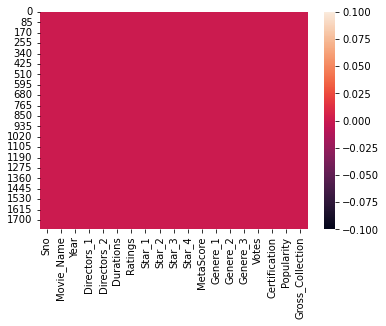

In [27]:
sns.heatmap(df.isnull())

In [28]:
df.shape

(1777, 19)

<AxesSubplot:xlabel='Durations', ylabel='Count'>

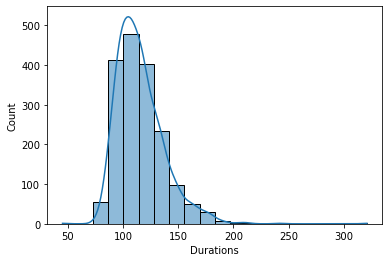

In [29]:
sns.histplot(data=df, x='Durations', bins=20, kde=True)

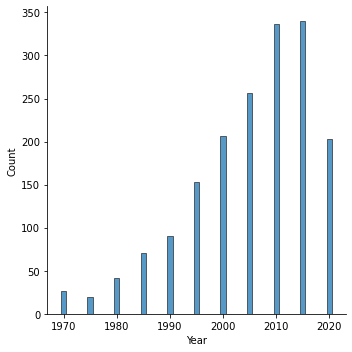

In [30]:
# Number of movies launched in the decades
sns.displot(pd.cut(df['Year'], bins=range(1970, 2026, 5), right=False, labels=range(1970, 2025, 5)))
plt.show()

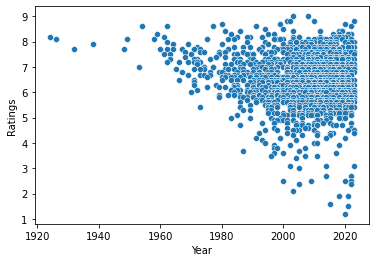

In [31]:
sns.scatterplot(data=df, x='Year', y='Ratings', )
plt.show()

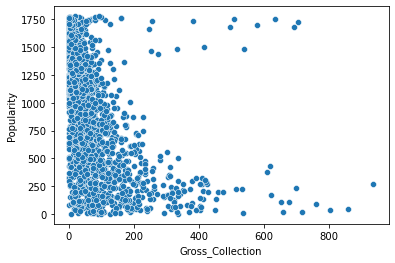

In [32]:
sns.scatterplot(data=df, x='Gross_Collection',y='Popularity')
plt.show()

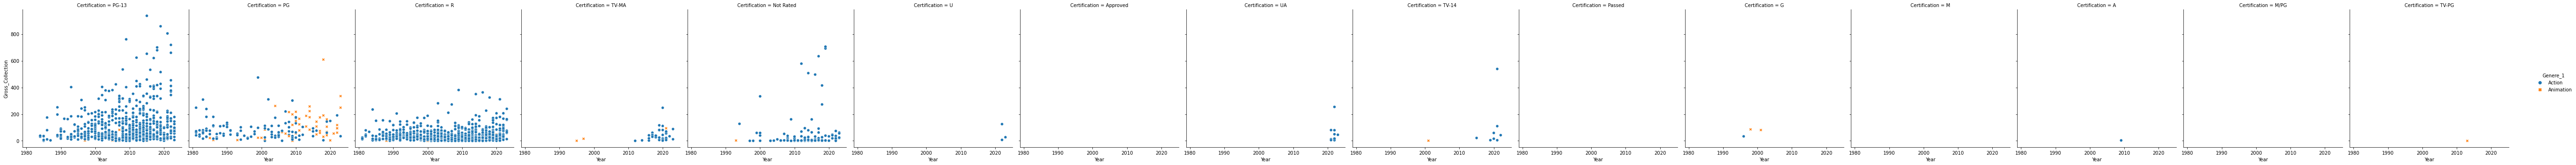

In [33]:
sns.relplot(
    data=df, x=df["Year"][df["Year"]>1980] , y="Gross_Collection",
    col="Certification", hue="Genere_1", style="Genere_1",
    kind="scatter"
)

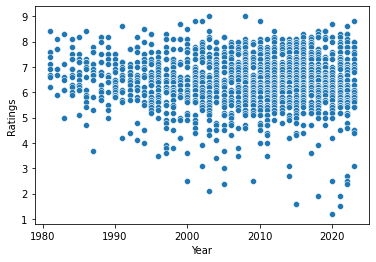

In [34]:
sns.scatterplot(x=df["Year"][df["Year"]>1980],y=df["Ratings"])
plt.show()

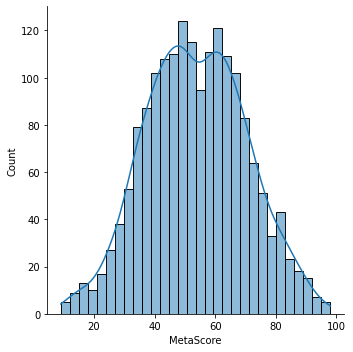

In [35]:
sns.displot(data=df,x='MetaScore',kde=True, bins=30)

In [36]:
print('max :',df['MetaScore'].max())
print('min :',df['MetaScore'].min())
print('mean:',df['MetaScore'].mean())

max : 98.0
min : 9.0
mean: 53.69133370849747


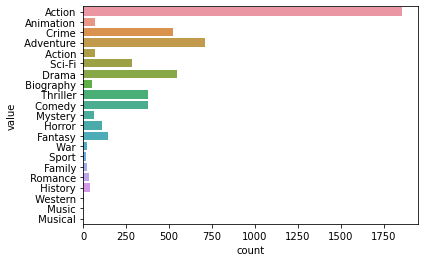

In [37]:
sns.countplot(data=pd.melt(df, value_vars=["Genere_1","Genere_2","Genere_3"]) , y="value")
plt.show()

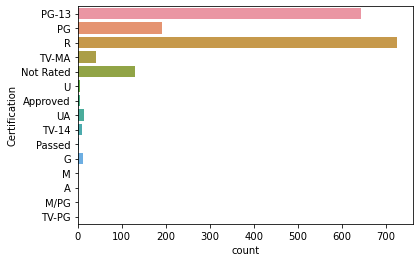

In [38]:
sns.countplot(data=df,y="Certification")
plt.show()

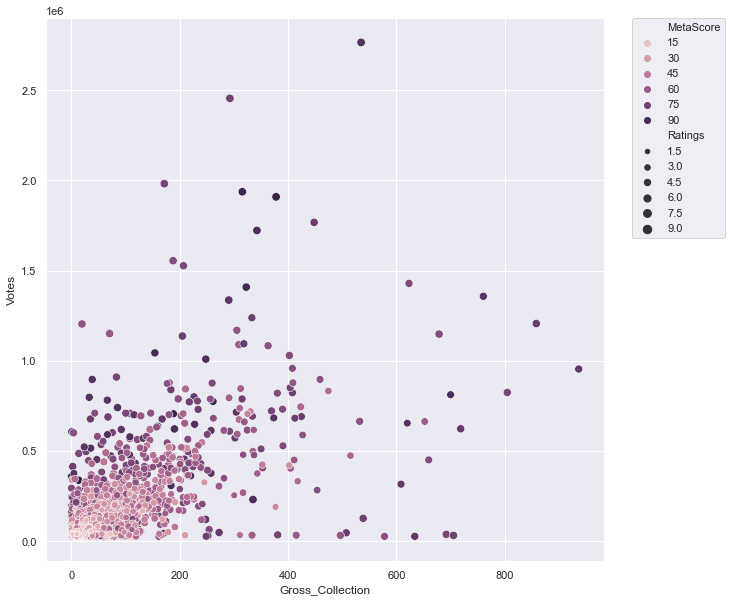

In [39]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="Gross_Collection", y="Votes",
                      hue="MetaScore", size="Ratings",
                      data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

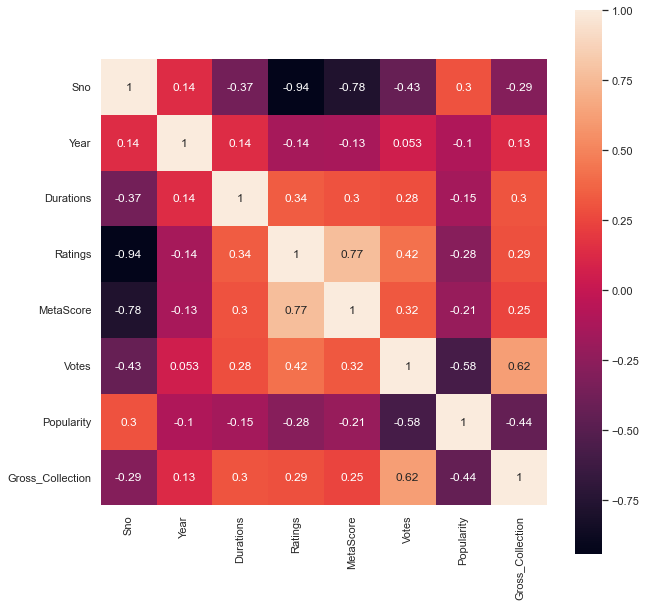

In [40]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot= True, vmax=1, square=True)
plt.show()

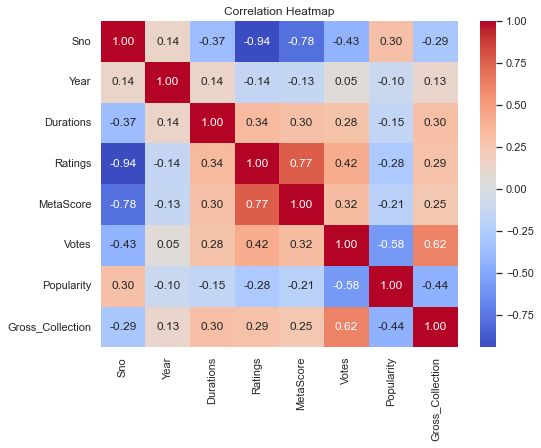

In [41]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Columns which are not used for machine learning

In [42]:
df.keys()

Index(['Sno', 'Movie_Name', 'Year', 'Directors_1', 'Directors_2', 'Durations',
       'Ratings', 'Star_1', 'Star_2', 'Star_3', 'Star_4', 'MetaScore',
       'Genere_1', 'Genere_2', 'Genere_3', 'Votes', 'Certification',
       'Popularity', 'Gross_Collection'],
      dtype='object')

In [43]:
df=df.drop(columns=['Sno','Movie_Name'], inplace=False)
df

,Year,Directors_1,Directors_2,Durations,Ratings,Star_1,Star_2,Star_3,Star_4,MetaScore,Genere_1,Genere_2,Genere_3,Votes,Certification,Popularity,Gross_Collection
0,2008,Christopher Nolan,Christopher Nolan,152,9.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,84.0,Action,Crime,Drama,2765738,PG-13,14,534.860
1,2003,Peter Jackson,Peter Jackson,201,9.0,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,94.0,Action,Adventure,Drama,1909264,PG-13,99,377.850
2,2023,Joaquim Dos Santos,Kemp Powers,140,8.8,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,86.0,Animation,Action,Adventure,230515,PG,3,335.215
3,2010,Christopher Nolan,Christopher Nolan,148,8.8,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,74.0,Action,Adventure,Sci-Fi,2455626,PG-13,13,292.580
4,2001,Peter Jackson,Peter Jackson,178,8.8,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,92.0,Action,Adventure,Drama,1937451,PG-13,43,315.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,2021,Prabhu Deva,Prabhu Deva,109,1.9,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,15.0,Action,Crime,Thriller,179131,TV-MA,1611,5.970
1773,2018,Remo D'Souza,Remo D'Souza,160,1.9,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,15.0,Action,Crime,Thriller,47900,Not Rated,1727,1.690
1774,2015,Sean Cain,Enzo Zelocchi,85,1.6,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,15.0,Action,Fantasy,Sci-Fi,42920,R,1775,1.690
1775,2021,Keith English,Keith English,125,1.5,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,15.0,Action,Crime,Drama,39624,R,1765,1.690


In [44]:
dff=df
dff

,Year,Directors_1,Directors_2,Durations,Ratings,Star_1,Star_2,Star_3,Star_4,MetaScore,Genere_1,Genere_2,Genere_3,Votes,Certification,Popularity,Gross_Collection
0,2008,Christopher Nolan,Christopher Nolan,152,9.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,84.0,Action,Crime,Drama,2765738,PG-13,14,534.860
1,2003,Peter Jackson,Peter Jackson,201,9.0,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,94.0,Action,Adventure,Drama,1909264,PG-13,99,377.850
2,2023,Joaquim Dos Santos,Kemp Powers,140,8.8,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,86.0,Animation,Action,Adventure,230515,PG,3,335.215
3,2010,Christopher Nolan,Christopher Nolan,148,8.8,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,74.0,Action,Adventure,Sci-Fi,2455626,PG-13,13,292.580
4,2001,Peter Jackson,Peter Jackson,178,8.8,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,92.0,Action,Adventure,Drama,1937451,PG-13,43,315.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,2021,Prabhu Deva,Prabhu Deva,109,1.9,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,15.0,Action,Crime,Thriller,179131,TV-MA,1611,5.970
1773,2018,Remo D'Souza,Remo D'Souza,160,1.9,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,15.0,Action,Crime,Thriller,47900,Not Rated,1727,1.690
1774,2015,Sean Cain,Enzo Zelocchi,85,1.6,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,15.0,Action,Fantasy,Sci-Fi,42920,R,1775,1.690
1775,2021,Keith English,Keith English,125,1.5,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,15.0,Action,Crime,Drama,39624,R,1765,1.690


**Encoding to the Categorical Data**

In [45]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
dff['Directors_1']=le.fit_transform(dff['Directors_1'])
dff['Directors_2']=le.fit_transform(dff['Directors_2'])
dff['Star_1']=le.fit_transform(dff['Star_1'])
dff['Star_2']=le.fit_transform(dff['Star_2'])
dff['Star_3']=le.fit_transform(dff['Star_3'])
dff['Star_4']=le.fit_transform(dff['Star_4'])
dff['Genere_1']=le.fit_transform(dff['Genere_1'])
dff['Genere_2']=le.fit_transform(dff['Genere_2'])
dff['Genere_3']=le.fit_transform(dff['Genere_3'])
dff['Certification']=le.fit_transform(dff['Certification'])

In [46]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 0 to 1776
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              1777 non-null   int32  
 1   Directors_1       1777 non-null   int32  
 2   Directors_2       1777 non-null   int32  
 3   Durations         1777 non-null   int32  
 4   Ratings           1777 non-null   float64
 5   Star_1            1777 non-null   int32  
 6   Star_2            1777 non-null   int32  
 7   Star_3            1777 non-null   int32  
 8   Star_4            1777 non-null   int32  
 9   MetaScore         1777 non-null   float64
 10  Genere_1          1777 non-null   int32  
 11  Genere_2          1777 non-null   int32  
 12  Genere_3          1777 non-null   int32  
 13  Votes             1777 non-null   int64  
 14  Certification     1777 non-null   int32  
 15  Popularity        1777 non-null   int64  
 16  Gross_Collection  1777 non-null   float64


All columns have been converted into integer or float datatype

# Outliers

In [47]:
z=np.abs(zscore(dff))
dfn=dff[(z<3).all(axis=1)]
dfn

,Year,Directors_1,Directors_2,Durations,Ratings,Star_1,Star_2,Star_3,Star_4,MetaScore,Genere_1,Genere_2,Genere_3,Votes,Certification,Popularity,Gross_Collection
8,2020,856,877,153,8.7,651,880,1267,969,78.500000,0,5,18,120427,11,1666,247.66
20,2003,650,679,101,8.4,113,1165,645,751,77.000000,0,5,11,606142,9,78,0.71
21,1986,359,414,137,8.4,628,774,180,1063,84.000000,0,1,13,740442,9,89,85.16
26,1995,599,632,170,8.3,15,948,1269,658,76.000000,0,4,4,688455,9,49,67.44
30,2016,640,669,161,8.3,0,985,390,1229,94.142857,0,2,4,200495,5,836,12.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1997,442,491,95,3.6,574,1066,505,1226,11.000000,0,1,6,56897,7,1132,35.93
1754,2017,26,111,99,3.6,578,345,970,1068,25.500000,0,5,18,33500,9,1776,19.86
1755,1996,189,261,98,3.5,519,48,14,283,40.000000,0,10,18,30542,9,1119,3.79
1756,2011,749,774,89,3.5,313,516,584,1193,37.000000,0,1,2,27347,6,1309,38.54


In [48]:
round((1777-1567)/1777 * 100 ,2)

11.82

11.82 % has been removed in outlier treatment, which is under considerable range.

# Skewness

In [49]:
dfn.skew()

Year               -0.917974
Directors_1        -0.098658
Directors_2        -0.134568
Durations           0.845120
Ratings            -0.320439
Star_1              0.033177
Star_2             -0.028512
Star_3              0.032389
Star_4              0.029049
MetaScore           0.119149
Genere_1            0.000000
Genere_2            1.375625
Genere_3            0.167344
Votes               1.977063
Certification      -0.204756
Popularity          0.001675
Gross_Collection    1.949945
dtype: float64

In [50]:
from sklearn.preprocessing import power_transform

for i in dfn.drop(["Gross_Collection","Votes"],axis=1).columns:
    if abs(dfn[f'{i}'].skew())>0.5:
        dfn[[f'{i}']]=power_transform(dfn[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Year
treated skewness for : Durations
treated skewness for : Genere_2


In [51]:
dfn.skew()

Year               -0.362030
Directors_1        -0.098658
Directors_2        -0.134568
Durations           0.022455
Ratings            -0.320439
Star_1              0.033177
Star_2             -0.028512
Star_3              0.032389
Star_4              0.029049
MetaScore           0.119149
Genere_1            0.000000
Genere_2            0.072430
Genere_3            0.167344
Votes               1.977063
Certification      -0.204756
Popularity          0.001675
Gross_Collection    1.949945
dtype: float64

Skewness has been removed from all the required columns

# Phase 4

**1) Write the complete Machine learning code to make predictions of votes and gross collection. Use appropriate models on their label basis. Remember you need to make 2 different predictions: vote and gross collection.**

**2) Apply all the best techniques of scaling, and hyperparameter tuning, and avoid underfitting or overfitting (bias/variance)**

**3) At the end save the best model and convey on which basis you have chosen that model**

# Model for Gross Collection.

**Scaling of Independent**

In [52]:
X=dfn.drop(["Gross_Collection"],axis=1)
y=dfn["Gross_Collection"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

**Predicting the best random state**

In [53]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.46868069742661767
At random state 0, The test accuracy is :-0.5336783668620743


At random state 1, The training accuracy is :-0.5057857303262696
At random state 1, The test accuracy is :-0.4616853728397817


At random state 2, The training accuracy is :-0.4649754279175794
At random state 2, The test accuracy is :-0.5391931763509994


At random state 3, The training accuracy is :-0.55374495890202
At random state 3, The test accuracy is :-0.36146596219907834


At random state 4, The training accuracy is :-0.5169738293112839
At random state 4, The test accuracy is :-0.42072536288753715


At random state 5, The training accuracy is :-0.5184701295912852
At random state 5, The test accuracy is :-0.42737814272654473


At random state 6, The training accuracy is :-0.5112479719783882
At random state 6, The test accuracy is :-0.4474841367805804


At random state 7, The training accuracy is :-0.5228460688022785
At random state 7, The test accuracy 

In [54]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=1)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(1047, 16) (1047,)
(516, 16) (516,)


In [55]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 34.41544920562128
Mean Squared Error: 2572.650092681824
Root Mean Squared Error: 50.72129821565911
R squared score:  0.4616853728397817
Cross Validation Score is : [0.44820134 0.44762398 0.39147901 0.48761734 0.59144933]
Mean Score : 0.473274201349389
Difference : 0.011588828509607296


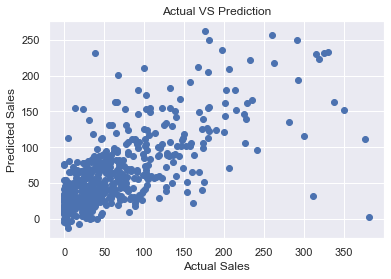

*****************************************************************************************
Scores for Lasso() are
Mean Absolute Error: 34.3767451355179
Mean Squared Error: 2574.6179919555398
Root Mean Squared Error: 50.74069364874252
R squared score:  0.46127359940551926
Cross Validation Score is : [0.45277453 0.44728507 0.39656517 0.49159911 0.59051367]
Mean Score : 0.4757475107675143
Difference : 0.014473911361995051


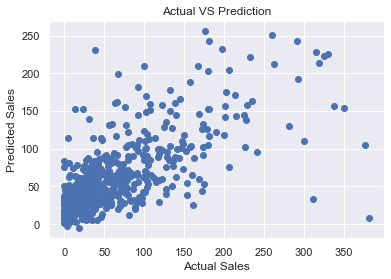

*****************************************************************************************
Scores for SVR() are
Mean Absolute Error: 41.70867589542061
Mean Squared Error: 4359.617639375889
Root Mean Squared Error: 66.0274006710539
R squared score:  0.08777103004501285
Cross Validation Score is : [0.10227895 0.14738118 0.09217189 0.12840407 0.06888936]
Mean Score : 0.10782509189503123
Difference : 0.020054061850018373


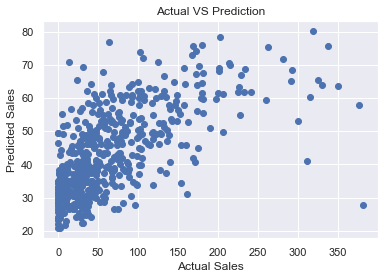

*****************************************************************************************
Scores for DecisionTreeRegressor() are
Mean Absolute Error: 42.034207584566595
Mean Squared Error: 4020.8319884412444
Root Mean Squared Error: 63.41003066109686
R squared score:  0.1586602939557542
Cross Validation Score is : [-0.04182561 -0.04685674  0.08355277  0.01289593  0.19326833]
Mean Score : 0.04020693561616935
Difference : -0.11845335833958485


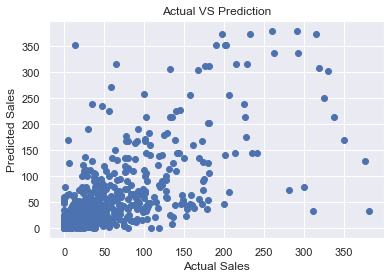

*****************************************************************************************
Scores for RandomForestRegressor() are
Mean Absolute Error: 30.89332434079164
Mean Squared Error: 2275.431628605481
Root Mean Squared Error: 47.7014845534757
R squared score:  0.5238769033279418
Cross Validation Score is : [0.42013521 0.505487   0.4739133  0.55323037 0.63696763]
Mean Score : 0.5179467026497415
Difference : -0.00593020067820027


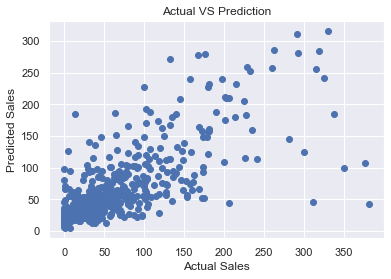

*****************************************************************************************
Scores for GradientBoostingRegressor() are
Mean Absolute Error: 30.730312928430518
Mean Squared Error: 2207.143846320761
Root Mean Squared Error: 46.98024953446672
R squared score:  0.5381657925028691
Cross Validation Score is : [0.48421376 0.52708293 0.40869878 0.51005563 0.64286117]
Mean Score : 0.5145824541131403
Difference : -0.023583338389728814


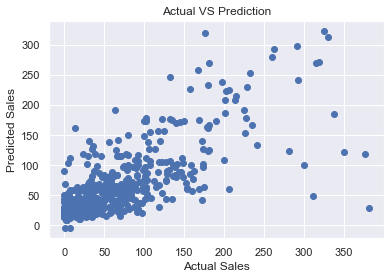

*****************************************************************************************


In [56]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("*****************************************************************************************")

# Hyperparamter Tuning and treating overfitting/underfitting

In [57]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [58]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3]
}

In [59]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'squared_error',
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [60]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.5083883886599116
The mean absolute error 31.592942246262645
root_mean_squared_error: 48.47115142294266


In [62]:
import joblib
joblib.dump(GB,"gross_collection.obj")

['gross_collection.obj']

In [63]:
GB_l=joblib.load('gross_collection.obj')

# model for Number of votes.

**Scaling of Independent**

In [64]:
X=dfn.drop(["Votes"],axis=1)
y=dfn["Votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

**Predicting the best random state**

In [65]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.6072736223203914
At random state 0, The test accuracy is :0.6310609955876814


At random state 1, The training accuracy is :0.6325581364288925
At random state 1, The test accuracy is :0.5924871163964549


At random state 2, The training accuracy is :0.6099941269287457
At random state 2, The test accuracy is :0.6354815772480851


At random state 3, The training accuracy is :0.6564059923394214
At random state 3, The test accuracy is :0.527532061829618


At random state 4, The training accuracy is :0.629312043859436
At random state 4, The test accuracy is :0.5954786307513497


At random state 5, The training accuracy is :0.6254145395425136
At random state 5, The test accuracy is :0.6029328733848307


At random state 6, The training accuracy is :0.6286826926848913
At random state 6, The test accuracy is :0.5882728785497483


At random state 7, The training accuracy is :0.6294361161564758
At random state 7, The test accuracy is :0.5902809457627

In [66]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=1)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(1047, 16) (1047,)
(516, 16) (516,)


Scores for LinearRegression() are
Mean Absolute Error: 75447.68541750115
Mean Squared Error: 12297529237.89394
Root Mean Squared Error: 110894.225448821
R squared score:  0.5924871163964549
Cross Validation Score is : [0.56718281 0.59123209 0.59724217 0.61840309 0.68169705]
Mean Score : 0.611151442200027
Difference : 0.018664325803572135


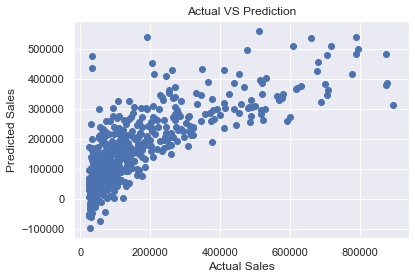

Scores for Lasso() are
Mean Absolute Error: 75447.39927718505
Mean Squared Error: 12297618024.793789
Root Mean Squared Error: 110894.62577056559
R squared score:  0.5924841741952305
Cross Validation Score is : [0.5671844  0.59123234 0.59724626 0.61842345 0.68169319]
Mean Score : 0.611155928977696
Difference : 0.01867175478246552


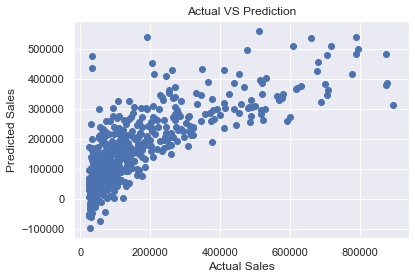

Scores for SVR() are
Mean Absolute Error: 112986.3420447269
Mean Squared Error: 35322687057.22003
Root Mean Squared Error: 187943.30809374413
R squared score:  -0.17051561991476327
Cross Validation Score is : [-0.17679092 -0.15504658 -0.10314411 -0.1754569  -0.11636437]
Mean Score : -0.14536057344782552
Difference : 0.025155046466937753


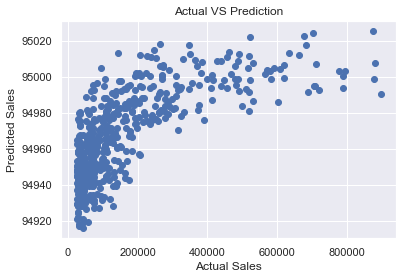

Scores for DecisionTreeRegressor() are
Mean Absolute Error: 77171.90697674418
Mean Squared Error: 14366330735.170542
Root Mean Squared Error: 119859.62929681763
R squared score:  0.5239316165517641
Cross Validation Score is : [0.45594879 0.42968469 0.69111429 0.44380446 0.67049311]
Mean Score : 0.5382090687590149
Difference : 0.01427745220725074


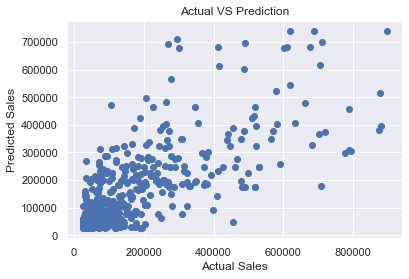

Scores for RandomForestRegressor() are
Mean Absolute Error: 56013.880872093025
Mean Squared Error: 7469561357.654897
Root Mean Squared Error: 86426.62412506285
R squared score:  0.7524752794462264
Cross Validation Score is : [0.66448097 0.66611649 0.72397355 0.78479254 0.78792159]
Mean Score : 0.7254570263248526
Difference : -0.027018253121373736


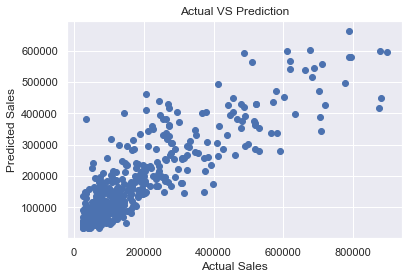

Scores for GradientBoostingRegressor() are
Mean Absolute Error: 51600.59293981487
Mean Squared Error: 6477884305.358718
Root Mean Squared Error: 80485.30490318539
R squared score:  0.7853372606919721
Cross Validation Score is : [0.73175539 0.69370787 0.71493274 0.79563792 0.82371325]
Mean Score : 0.7519494347367462
Difference : -0.033387825955225825


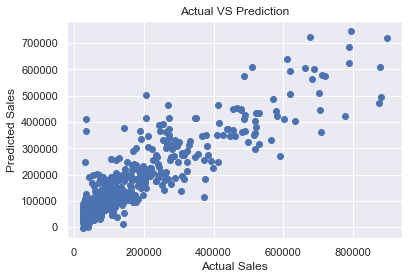

In [67]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==================================================================================================")

# Hyperparamter Tuning and treating overfitting/underfitting

In [68]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [69]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.2,
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [70]:
GB1= GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: 0.773748533324232
The mean absolute error 52280.40263514609
root_mean_squared_error: 82629.27870546746


In [71]:
import joblib
joblib.dump(GB1,"votes.obj")

['votes.obj']

In [72]:
GB1_l=joblib.load('votes.obj')